In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from config import *


## Переведем в паркеты

In [1]:
!python to_parquets.py

## helper functions

In [4]:
def pie_plot(df:pd.DataFrame, column:str, postfix=""):
    counts = df.value_counts(column)
    plt.title(f"{column} {postfix}")
    plt.pie(counts.values, labels = [f"{x}" for x in counts.index], colors = sns.color_palette('pastel'), autopct='%.0f%%')
    plt.show()

In [5]:
def show_boxplot(df, column):
    plt.title(column)
    sns.boxplot(data=df, x=column)
    plt.show()

## Данные о вводе товаров в оборот

In [2]:
input_circulation_data = pd.read_parquet(INPUT_CIRCULATION_PARQUET_FILENAME)

In [3]:
input_circulation_data.head()

,dt,inn,gtin,prid,operation_type,cnt
0,2021-11-22,F0C677A146366202906368AF9FCEC188,C238E7C33B56BA911F576777316EC9F2,F0C677A146366202906368AF9FCEC188,Импорт. Не ЕАЭС,6
1,2021-11-22,F0DC262C40FBA363CFCEF8005E4C6140,4D3423957ECDC40F70E37EB75A6A2D3E,F0DC262C40FBA363CFCEF8005E4C6140,Перемаркировка,10
2,2021-11-22,32D845A9CC2A5BFA9F77CAE0E9A905A5,F1931263F03E1D89A43A3633AAF9FB84,32D845A9CC2A5BFA9F77CAE0E9A905A5,Импорт. Не ЕАЭС,600
3,2021-11-22,CE816FDF82B121C67CAE9B79203B8BA1,0374D8CAC82E9F0D47C95FA13D68C7C6,CE816FDF82B121C67CAE9B79203B8BA1,Импорт. Не ЕАЭС,1860
4,2021-11-22,E34F3F6C9E49FE46C87D067306AAC29B,BBC31CA374A30B34CAFBFD027888A73D,E34F3F6C9E49FE46C87D067306AAC29B,РФ,1


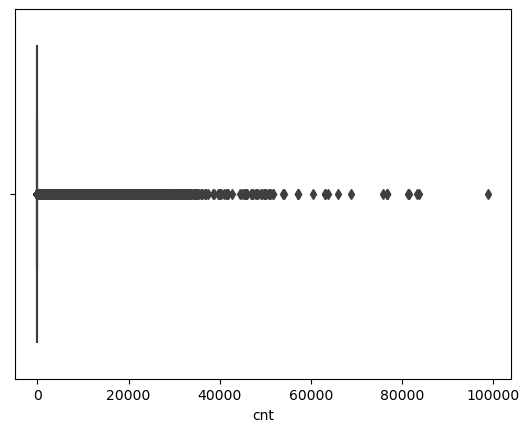

In [15]:
sns.boxplot(data=input_circulation_data, x="cnt")
plt.show()

операции записываются подневно в течение года!

In [23]:
def date_info():
    dates = sorted(input_circulation_data.dt.unique())
    print(f"number of days: {len(dates)}", f"first_day: {dates[0]}", f"last_day: {dates[-1]}", sep='\n')
date_info()

number of days: 365
first_day: 2021-11-22
last_day: 2022-11-21


In [6]:
input_circulation_data

,dt,inn,gtin,prid,operation_type,cnt
0,2021-11-22,F0C677A146366202906368AF9FCEC188,C238E7C33B56BA911F576777316EC9F2,F0C677A146366202906368AF9FCEC188,Импорт. Не ЕАЭС,6
1,2021-11-22,F0DC262C40FBA363CFCEF8005E4C6140,4D3423957ECDC40F70E37EB75A6A2D3E,F0DC262C40FBA363CFCEF8005E4C6140,Перемаркировка,10
2,2021-11-22,32D845A9CC2A5BFA9F77CAE0E9A905A5,F1931263F03E1D89A43A3633AAF9FB84,32D845A9CC2A5BFA9F77CAE0E9A905A5,Импорт. Не ЕАЭС,600
3,2021-11-22,CE816FDF82B121C67CAE9B79203B8BA1,0374D8CAC82E9F0D47C95FA13D68C7C6,CE816FDF82B121C67CAE9B79203B8BA1,Импорт. Не ЕАЭС,1860
4,2021-11-22,E34F3F6C9E49FE46C87D067306AAC29B,BBC31CA374A30B34CAFBFD027888A73D,E34F3F6C9E49FE46C87D067306AAC29B,РФ,1
...,...,...,...,...,...,...
740579,2022-11-21,6B8E111AB5B5C556C0AEA292ACA4D88B,476D3708FBD4E6B64F81D10BC28EA694,7D1B71037D27D5597BEA1D5077663541,Возврат,1
740580,2022-11-21,25977F1E02F92D2B5AB3605B196C7ACB,37458AD74B59A3DE08EAE571C63DD3CF,7D1B71037D27D5597BEA1D5077663541,Возврат,1
740581,2022-11-21,126F1B83C0B42598DEE7E815A6ACAC71,DB81FBEFD3EAA20E18DCCCD397717499,126F1B83C0B42598DEE7E815A6ACAC71,Возврат,2
740582,2022-11-21,0E8EEC5192C68CF67F0E02AE30AFB56A,0504A3B05E1BD8A63D3A83F13CF49658,88747153B9CE8C25EA0347DC712C1368,Возврат,1


In [12]:
fig = px.pie(
    data_frame = input_circulation_data["operation_type"], 
    # values="operation_type", 
    # names="operation_type",
    title='Population of European continent'
    )

In [ ]:
fig

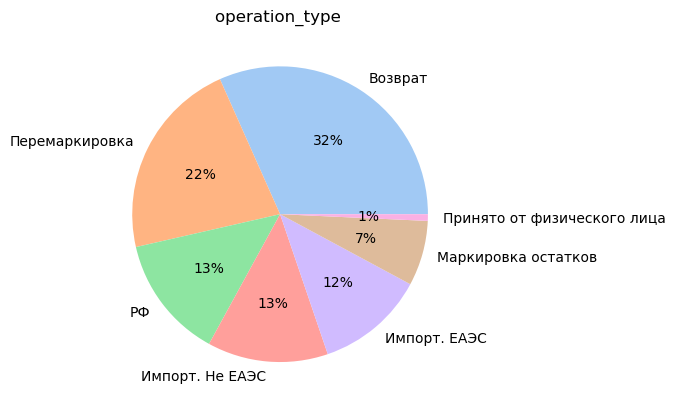

In [109]:
pie_plot(input_circulation_data, "operation_type", postfix="")

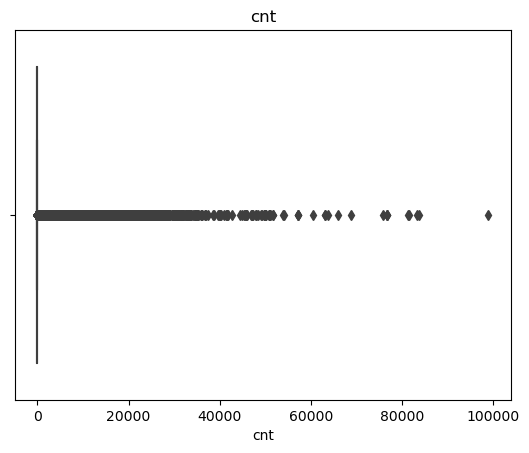

In [101]:
show_boxplot(input_circulation_data, 'cnt')

## Данные о выводе товаров из оборота

### NOTES

1. сегрегировать розничные сделки от оптовых 
2. перепад температур 


In [87]:
output_circulation_data = pd.read_parquet(OUTPUT_CIRCULATION_PARQUET_FILENAME)

In [88]:
output_circulation_data.head()

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2021-11-22,5A3E5F7B2D093D1D6CB3CF93BA9AC8A6,DC7432556B58D454B4E37F0F0D1E663D,B035ED5D308BC70E5EA9342B6DBF5810,19485F700068E6A9A8593AFDE9803638,Продажа конечному потребителю в точке продаж,3500,1
1,2021-11-22,9A2202A48FC5E462C44B78B0C79E1DBD,D18B1B470E57871FAB5B4E949E256BB4,DD486FED86564603D2CD7CF9EED2C458,C2969A4C8A40C12902EAD4936E303045,Продажа конечному потребителю в точке продаж,56714,1
2,2021-11-22,877ABE9DE14E0B510DFC8DE63EEFA817,62B5EAEF59E6693F44B1074C1140BF45,62B5EAEF59E6693F44B1074C1140BF45,5637334F301773E28AE8730713E6D5F7,Продажа конечному потребителю в точке продаж,74314,1
3,2021-11-22,B004F889F17F8AB365C494B3D0D06E1A,D7326D87A37D73AF19AF53668A7116D6,D7326D87A37D73AF19AF53668A7116D6,0FF56DEC16050D3B6372F2CB1BD6DFCB,Продажа конечному потребителю в точке продаж,4999,1
4,2021-11-22,E1C0503EA9201D56D7173CB4CA4A6AFA,50955BB0B97298EEAEB1F6CF9712F37A,39FFA592BE77CA7DE37C65C1B8423E8C,9E660AA1DE428BA88D1942DB2824BDAB,Продажа конечному потребителю в точке продаж,29857,1


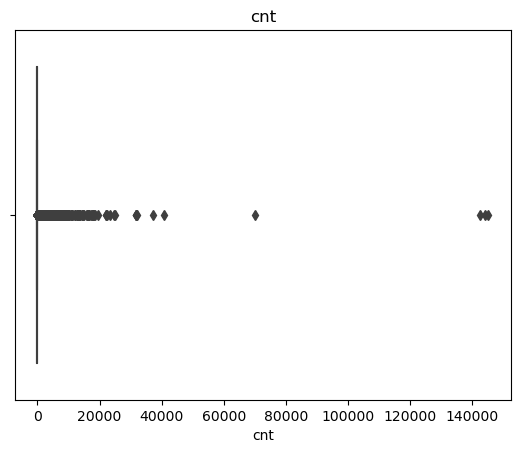

In [98]:
show_boxplot(output_circulation_data, 'cnt')

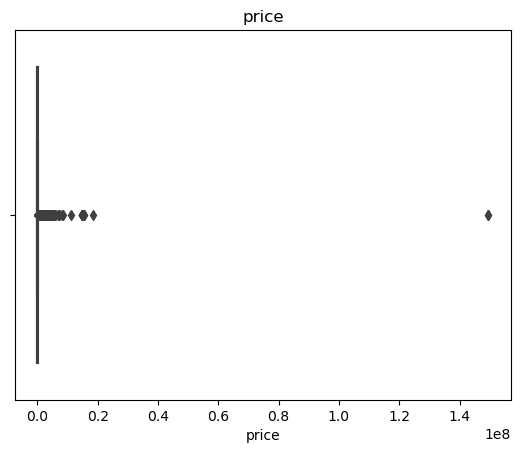

In [99]:
show_boxplot(output_circulation_data, 'price')

In [91]:
output_circulation_data.cnt.max()

145162

In [95]:
output_circulation_data.value_counts("type_operation")

type_operation
Продажа конечному потребителю в точке продаж    49293851
Дистанционная продажа конечному потребителю      1290715
Прочий тип вывода из оборота                     1205299
Конечная продажа организации                      123971
Списание / Вывод из оборота без получателя         92474
Продажи за пределы РФ                              88286
Продажа по государственному контракту                585
dtype: int64

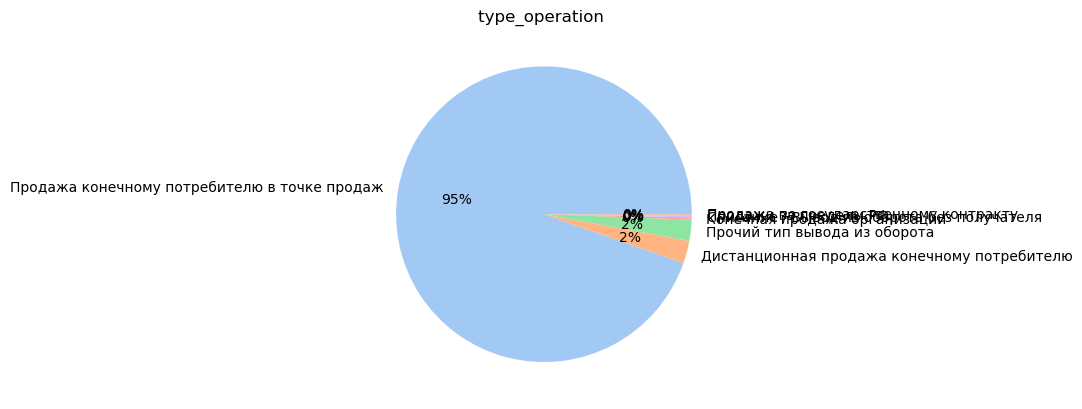

In [110]:
pie_plot(output_circulation_data, "type_operation", postfix="")

## Данные о перемещениях товаров 

In [2]:
transition_circulation_data = pd.read_parquet(TRANSITION_CIRCULATION_PARQUET_FILENAME)

In [4]:
transition_circulation_data.head()

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
0,2021-11-22,867FDFE9E03925792F329DEDBAA3955F,9246A2BE043136FC4B4A166BB0E25D3E,2E55013259E009F4FC1E5EFCF170EA8B,8D5F8E7D20AD9A8D0E8EE5769321D8C3,1
1,2021-11-22,4FB53B945150E362C307D60297066562,9246A2BE043136FC4B4A166BB0E25D3E,32B53198A919C559CB84DC0487947E80,EDE6F6D21300D96A9E207EA4F59321EF,1
2,2021-11-22,38BA9B93C5C987770AD698646D2FAB66,2DADC5DF60A9FC194A3388C1612CC967,3A87113AC25EFD88BD3407ACECFA3869,D02A2294DDF3BCF7218D6FEFDB35A906,1
3,2021-11-22,FA77213DA058666C6781164754CBC0EB,FFC432B34974A68B2845FBED9A7DEB29,C5CDC4F467B7CDA0F3E082BFFEDA9938,051C7D77FE590C5428DB57FD48C5DB9C,3
4,2021-11-22,E5635C538FE51D88504CE5CFF8BC1D2C,6E536425E534ABA7AB9FEA2ACA91A775,AE7F5C67298A67CACD2A193C9405524F,0D28C0E0C8ADAA3D9B55B557C71D8A8E,2


<AxesSubplot: xlabel='cnt_moved'>

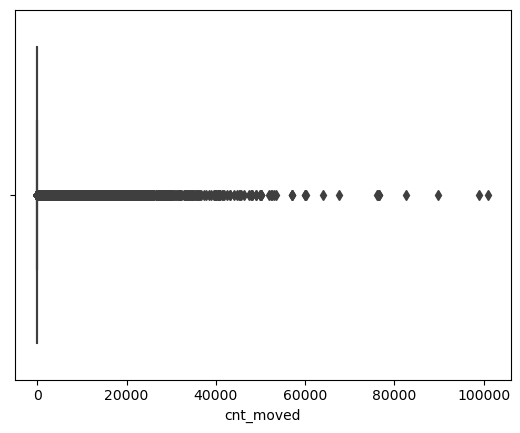

In [10]:
sns.boxplot(data=transition_circulation_data, x="cnt_moved")

## Данные о перемещениях товаров 

In [24]:
outlets_handbook_data = pd.read_csv(OUTLETS_HANDBOOK_FILENAME)

In [26]:
outlets_handbook_data.head()

,id_sp_,inn,region_code,city_with_type,city_fias_id,postal_code
0,C72AC534DBF5E6369840FFE9DA9FF403,0056F9FCFA009E493BEFEAE4FAA71D82,51,NaN,NaN,184421.0
1,591942644AE25AE4DD26CF943BB97414,81AAC456284F455FC2B141E6E8F1A76C,66,г Екатеринбург,2763c110-cb8b-416a-9dac-ad28a55b4402,620027.0
2,A6E2261F16F84FF09E2B615EDB008943,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390026.0
3,DC3B647A089FA064DE61E0C778F5EE45,87C2FDB73C26C96266A0947C2BB714BF,62,г Рязань,86e5bae4-ef58-4031-b34f-5e9ff914cd55,390017.0
4,D2F125BAA947B6293CD055DA1DEEA87D,87C2FDB73C26C96266A0947C2BB714BF,62,г Рыбное,91d71d8c-2f1a-43c8-bc84-d78dc4245a1b,391112.0


In [28]:
print(f"{outlets_handbook_data['city_with_type'].isna().sum()}/{len(outlets_handbook_data)}")

18776/58401


In [44]:
def plot_nans(df, column:str):    
    count_nans = df[column].isna().sum()
    data = [count_nans, len(df) - count_nans]
    labels = ['nan', 'normal']

    plt.title(column)
    plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:2], autopct='%.0f%%')
    plt.show()

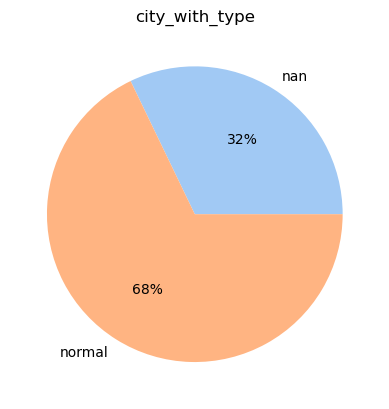

In [45]:
plot_nans(outlets_handbook_data, "city_with_type")

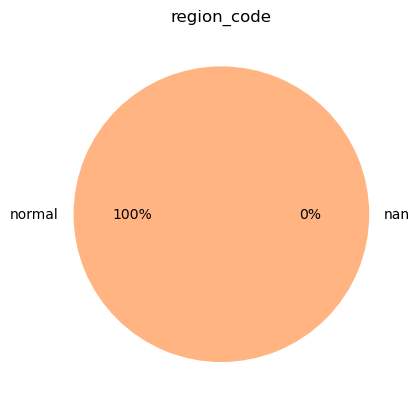

In [46]:
plot_nans(outlets_handbook_data, "region_code")

у нас есть все коды регионов, но у трети примеров отсутствует строка города, зато у 99%+ есть почтовый индекс по которому мы можем вычислить город и даже район. 

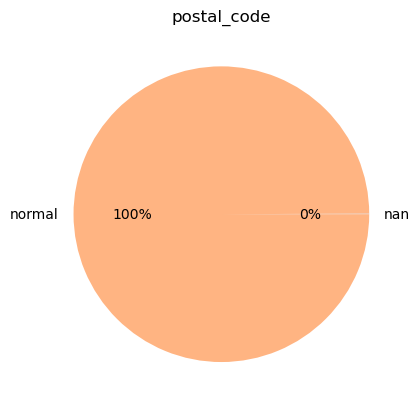

In [47]:
plot_nans(outlets_handbook_data, "postal_code")

## Справочник участников оборота товаров

In [48]:
participators_handbook_data = pd.read_csv(PARTICIPATORS_HANDBOOK_FILENAME)

In [49]:
participators_handbook_data

,inn,region_code
0,60DFB6F87ABF6232A5D97A1A827F8D88,1
1,2D13C279C7CEC509D21695F0268ECCEA,1
2,1705C73792D7A1A5ABDF1883FE851004,1
3,B4CC35BD7D8F69E665160F548EBE125D,23
4,2DB318BEA4A44280FA488A0B2AF36254,1
...,...,...
23467,FD378AE7B1D03A5B949A96BF2715B941,77
23468,CB8661DA918DFA68498D7F929C426E1E,99
23469,92ECDE80D71E459551E809AF332785AA,77
23470,86B3B09285C227598C66DE143C5AD336,78


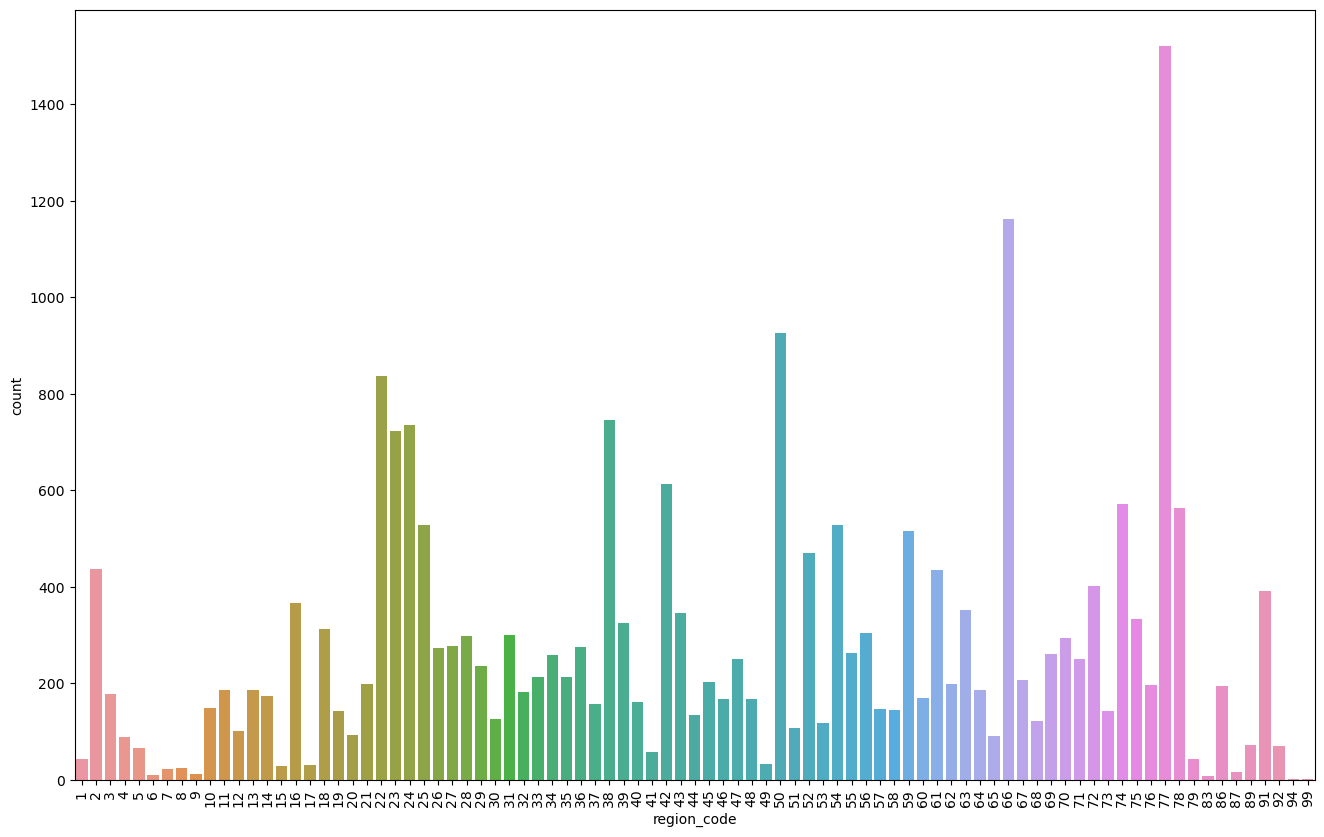

In [65]:
plt.figure(figsize=(16, 10))
sns.countplot(data=participators_handbook_data, x="region_code")
plt.xticks(rotation=90)
plt.show()

топ 10 городов по кол-ву участников рынка

In [69]:
participators_handbook_data.value_counts("region_code", ascending=False).head(10) 

region_code
77    1520
66    1163
50     926
22     836
38     745
24     735
23     724
42     614
74     571
78     564
dtype: int64

## Справочник продукции